# MARIA FERNANDA MORALES ALVAREZ

# Hoja de Trabajo 1: Experimentación con Redes Neuronales

## Introducción
Este ejercicio tiene como objetivo profundizar en la comprensión de las redes neuronales mediante la experimentación. A través de variaciones en la arquitectura y parámetros, se busca entender cómo se comporta y aprende una red neuronal. Utilizaremos el dataset "Heart Disease" disponible en el UCI Machine Learning Repository.

## Dataset "Heart Disease"
Puedes descargar el dataset directamente desde el siguiente enlace:
http://archive.ics.uci.edu/dataset/45/heart+disease. Recuerda que vamos a estar utilizando CRISP-DM para crear los modelos. El primer paso es comprender los datos. Ese link te proporciona la información necesaria para entender el dataset. Las columnas y el rol que cada columna va a jugar en tu modelo (variables independientes y dependiente). Como menciona la documentación, utiliza solo la base de datos de Cleveland.

## Sección 1: Preparación de Datos
* Descarga y carga el dataset "Heart Disease".
* Realiza un breve análisis exploratorio: ¿Qué tipo de datos contiene? ¿Cuántos ejemplos hay?. 
* Procesa el dataset: normaliza o estandariza si es necesario, divide el dataset en conjuntos de entrenamiento y prueba.

Nuestro enfoque de hoy no es un mega modelo sino comprender mejor como se comportan las redes neuronales. Realiza lo necesario pero nada muy extravagante.

In [15]:
# importar librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
#Importar dataset

data = pd.read_csv('heart.csv')

data.head(11)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [17]:
# Información sobre las variables del dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [18]:
# Columnas del Dataset
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [19]:
# Exploración estadistica del Dataset
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [20]:
# Revisar valores unicos en cada variable

for i in data.columns:
  print(i, ':\n', np.unique(data[i]), '\n')

age :
 [29 34 35 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67 68 69 70 71 74 76 77] 

sex :
 [0 1] 

cp :
 [0 1 2 3] 

trestbps :
 [ 94 100 101 102 104 105 106 108 110 112 114 115 117 118 120 122 123 124
 125 126 128 129 130 132 134 135 136 138 140 142 144 145 146 148 150 152
 154 155 156 160 164 165 170 172 174 178 180 192 200] 

chol :
 [126 131 141 149 157 160 164 166 167 168 169 172 174 175 176 177 178 180
 182 183 184 185 186 187 188 192 193 195 196 197 198 199 200 201 203 204
 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 239 240 241
 242 243 244 245 246 247 248 249 250 252 253 254 255 256 257 258 259 260
 261 262 263 264 265 266 267 268 269 270 271 273 274 275 276 277 278 281
 282 283 284 286 288 289 290 293 294 295 298 299 300 302 303 304 305 306
 307 308 309 311 313 315 318 319 321 322 325 326 327 330 335 340 341 342
 353 354 360 394 407 409 4

In [21]:
# Principales enfermedades de personas en un rango de edad de 36 a 55 años población activa
edadmedia = data [data['age'] <=55][data['age'] >35]
print(
    "No hay {} entradas que pertenecen a la poblacion de activo de{} entradas totales".
    format(edadmedia.shape, data.shape))
edadmedia.head()

No hay (145, 14) entradas que pertenecen a la poblacion de activo de(303, 14) entradas totales


C:\Users\Compu Fire\AppData\Local\Temp\ipykernel_15416\2054066368.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  edadmedia = data [data['age'] <=55][data['age'] >35]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1


In [22]:
numero_columnas=['trestbps','chol','thalach','age','oldpeak']

In [23]:
# Matriz de Correlación entre todas las variables

corr_matrix = round(data.corr(), 2)

corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.00,-0.10,-0.07,0.28,0.21,0.12,-0.12,-0.40,0.10,0.21,-0.17,0.28,0.07,-0.23
sex,-0.10,1.00,-0.05,-0.06,-0.20,0.05,-0.06,-0.04,0.14,0.10,-0.03,0.12,0.21,-0.28
cp,-0.07,-0.05,1.00,0.05,-0.08,0.09,0.04,0.30,-0.39,-0.15,0.12,-0.18,-0.16,0.43
trestbps,0.28,-0.06,0.05,1.00,0.12,0.18,-0.11,-0.05,0.07,0.19,-0.12,0.10,0.06,-0.14
chol,0.21,-0.20,-0.08,0.12,1.00,0.01,-0.15,-0.01,0.07,0.05,-0.00,0.07,0.10,-0.09
fbs,0.12,0.05,0.09,0.18,0.01,1.00,-0.08,-0.01,0.03,0.01,-0.06,0.14,-0.03,-0.03
restecg,-0.12,-0.06,0.04,-0.11,-0.15,-0.08,1.00,0.04,-0.07,-0.06,0.09,-0.07,-0.01,0.14
thalach,-0.40,-0.04,0.30,-0.05,-0.01,-0.01,0.04,1.00,-0.38,-0.34,0.39,-0.21,-0.10,0.42
exang,0.10,0.14,-0.39,0.07,0.07,0.03,-0.07,-0.38,1.00,0.29,-0.26,0.12,0.21,-0.44
oldpeak,0.21,0.10,-0.15,0.19,0.05,0.01,-0.06,-0.34,0.29,1.00,-0.58,0.22,0.21,-0.43


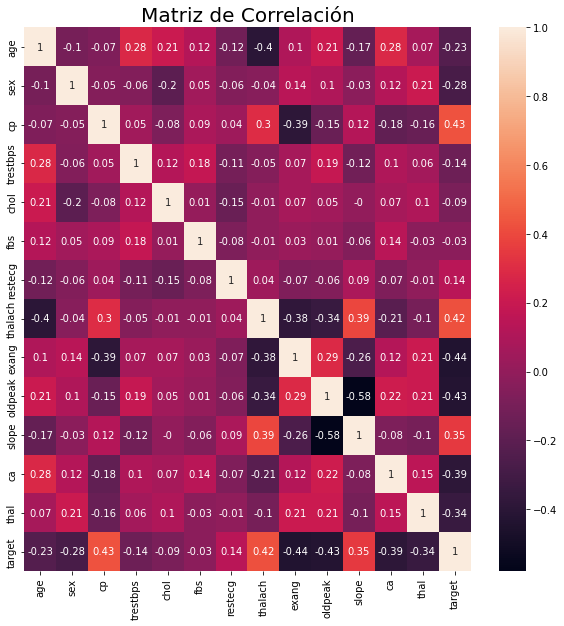

In [24]:
# Visualización de Matriz de Correlación entre todas las variables
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True)
plt.title("Matriz de Correlación", fontdict={"fontsize":20, "color":"black"})
plt.show()

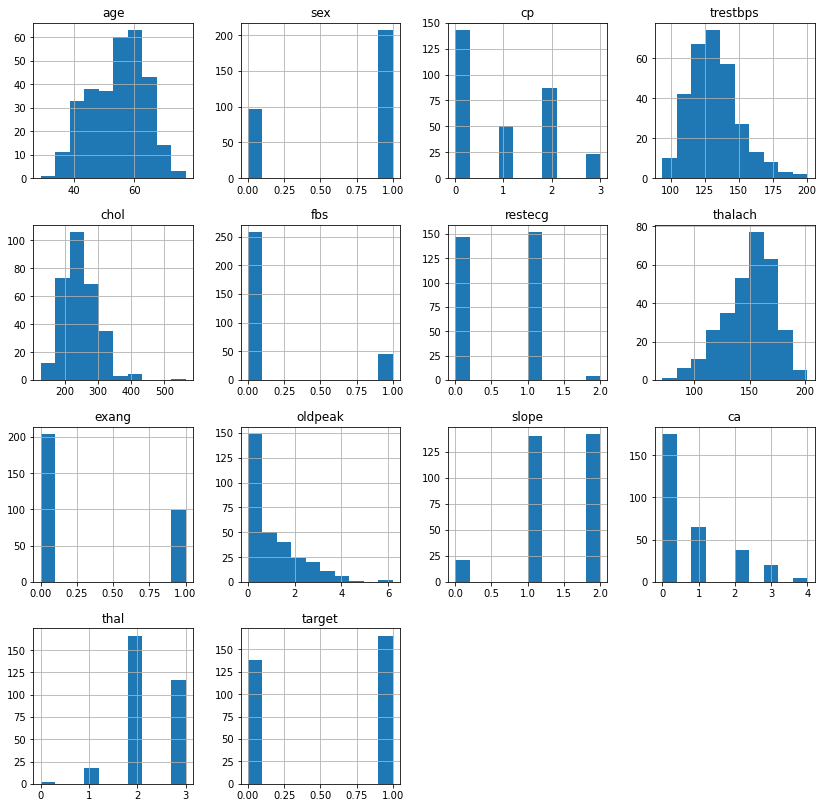

In [25]:
# Visualización
data.hist(figsize=(14,14))
plt.show()

In [26]:
# creando variables
edadmedia

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0


## Sección 2: Construcción de la Red Neuronal

Construye una red neuronal básica utilizando Keras.

* Define la arquitectura: número de capas, neuronas por capa, función de activación.
* Compila el modelo especificando la función de pérdida, el optimizador y métricas adicionales.
* Realiza una breve descripción escrita de la arquitectura que has definido.

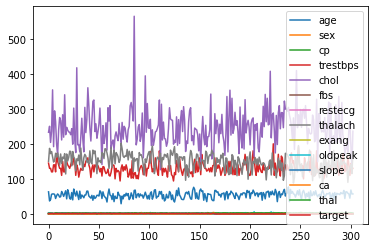

In [27]:
data.plot()
plt.show()

In [29]:
# Dividir los datos en características X / y
X = data.drop('target', axis=1)
y = data['target']

# Entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizando los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelo de la red neuronal
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenamiento
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')


Epoch 1/20
7/7 [==============================] - 2s 60ms/step - loss: 0.7446 - accuracy: 0.4747 - val_loss: 0.6938 - val_accuracy: 0.4000
Epoch 2/20
7/7 [==============================] - 0s 18ms/step - loss: 0.6386 - accuracy: 0.6452 - val_loss: 0.5892 - val_accuracy: 0.6800
Epoch 3/20
7/7 [==============================] - 0s 11ms/step - loss: 0.5645 - accuracy: 0.7327 - val_loss: 0.5196 - val_accuracy: 0.8000
Epoch 4/20
7/7 [==============================] - 0s 12ms/step - loss: 0.5076 - accuracy: 0.8295 - val_loss: 0.4666 - val_accuracy: 0.7600
Epoch 5/20
7/7 [==============================] - 0s 11ms/step - loss: 0.4630 - accuracy: 0.8341 - val_loss: 0.4262 - val_accuracy: 0.7600
Epoch 6/20
7/7 [==============================] - 0s 15ms/step - loss: 0.4270 - accuracy: 0.8433 - val_loss: 0.3969 - val_accuracy: 0.8800
Epoch 7/20
7/7 [==============================] - 0s 14ms/step - loss: 0.3994 - accuracy: 0.8479 - val_loss: 0.3739 - val_accuracy: 0.8800
Epoch 8/20
7/7 [===========

### Tu descripción aquí
La capa de entrada es con 64 neuronas, con activación ReLU, la capa oculta con 32 neuronas siempre con activación ReLU y la capa de salida con 1 neurona con activación Sigmoide lo cual produce una única salida para generar una probabilidad entre 0 y 1 para la predicción de la red neuronal sobre la enfermedad cardíaca en el paciente.

## Sección 3: Experimentación

Utiliza ciclos para las siguientes pruebas. Debes entrenar varios modelos variando el parámetro indicado en cada inciso según el rango y paso proporcionado. Recuerda almacenar tus resultados porque te servirán en la siguiente sección.

### Variabilidad en Capas Ocultas:

Las redes con demasiadas capas pueden tardar mucho tiempo en entrenarse, especialmente si no se dispone de un hardware adecuado.

* Rango: Entre 1 y 10 capas.
* Paso: 1 capa.
* Nota: En muchos problemas, incluso 2-3 capas son suficientes para obtener buenos resultados. Por encima de eso, a veces se necesita una arquitectura especializada o un problema muy complejo para justificar más capas.

In [30]:
### Tu código aquí

# Rangos y pasos para los parámetros
num_units_range = [32, 64, 128]
num_layers_range = [1, 2, 3]
batch_size_range = [16, 32, 64]

results = []

# Pruebas variando los parámetros
for num_units in num_units_range:
    for num_layers in num_layers_range:
        for batch_size in batch_size_range:
            model = Sequential()
            model.add(Dense(num_units, input_dim=X_train.shape[1], activation='relu'))
            for _ in range(num_layers - 1):
                model.add(Dense(num_units, activation='relu'))
            model.add(Dense(1, activation='sigmoid'))

            model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
            
            history = model.fit(X_train, y_train, epochs=20, batch_size=batch_size, validation_split=0.1, verbose=0)
            
            loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
            
            results.append({
                'num_units': num_units,
                'num_layers': num_layers,
                'batch_size': batch_size,
                'loss': loss,
                'accuracy': accuracy
            })

# Resultados
for result in results:
    print(f"Num Units: {result['num_units']}, Num Layers: {result['num_layers']}, Batch Size: {result['batch_size']}, Loss: {result['loss']:.4f}, Accuracy: {result['accuracy']:.4f}")


Num Units: 32, Num Layers: 1, Batch Size: 16, Loss: 0.4250, Accuracy: 0.8689
Num Units: 32, Num Layers: 1, Batch Size: 32, Loss: 0.3869, Accuracy: 0.8525
Num Units: 32, Num Layers: 1, Batch Size: 64, Loss: 0.5122, Accuracy: 0.8689
Num Units: 32, Num Layers: 2, Batch Size: 16, Loss: 0.3867, Accuracy: 0.8525
Num Units: 32, Num Layers: 2, Batch Size: 32, Loss: 0.3495, Accuracy: 0.8852
Num Units: 32, Num Layers: 2, Batch Size: 64, Loss: 0.4148, Accuracy: 0.8361
Num Units: 32, Num Layers: 3, Batch Size: 16, Loss: 0.4636, Accuracy: 0.8689
Num Units: 32, Num Layers: 3, Batch Size: 32, Loss: 0.4612, Accuracy: 0.8361
Num Units: 32, Num Layers: 3, Batch Size: 64, Loss: 0.3966, Accuracy: 0.8361
Num Units: 64, Num Layers: 1, Batch Size: 16, Loss: 0.3744, Accuracy: 0.8689
Num Units: 64, Num Layers: 1, Batch Size: 32, Loss: 0.3740, Accuracy: 0.8525
Num Units: 64, Num Layers: 1, Batch Size: 64, Loss: 0.3996, Accuracy: 0.8525
Num Units: 64, Num Layers: 2, Batch Size: 16, Loss: 0.4200, Accuracy: 0.8525

In [31]:
# Número de capas
num_layers_range = range(1, 11)

results = []

# Variando el número de capas
for num_layers in num_layers_range:
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    for _ in range(num_layers - 1):
        model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=0)
    
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    
    results.append({
        'num_layers': num_layers,
        'loss': loss,
        'accuracy': accuracy
    })

# Resultados
for result in results:
    print(f"Num Layers: {result['num_layers']}, Loss: {result['loss']:.4f}, Accuracy: {result['accuracy']:.4f}")


Num Layers: 1, Loss: 0.3636, Accuracy: 0.8852
Num Layers: 2, Loss: 0.4085, Accuracy: 0.8852
Num Layers: 3, Loss: 0.5348, Accuracy: 0.8525
Num Layers: 4, Loss: 0.6052, Accuracy: 0.8525
Num Layers: 5, Loss: 0.9706, Accuracy: 0.8361
Num Layers: 6, Loss: 0.9104, Accuracy: 0.8525
Num Layers: 7, Loss: 1.2584, Accuracy: 0.8197
Num Layers: 8, Loss: 1.2692, Accuracy: 0.7541
Num Layers: 9, Loss: 1.1980, Accuracy: 0.8361
Num Layers: 10, Loss: 1.4317, Accuracy: 0.8361


### Variabilidad en Neuronas:

El número de neuronas por capa influye en la capacidad de la red. Sin embargo, demasiadas neuronas pueden hacer que el entrenamiento sea más lento y puede causar sobreajuste.

* Rango: Entre 10 y 1000 neuronas.
* Paso: Incremento logarítmico

In [32]:
### Tu código aquí
# Número de neuronas con incremento logarítmico
num_neurons_range = [int(10 ** (i / 4)) for i in range(17)]

results = []

# Variando el número de neuronas
for num_neurons in num_neurons_range:
    model = Sequential()
    model.add(Dense(num_neurons, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=0)
    
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    
    results.append({
        'num_neurons': num_neurons,
        'loss': loss,
        'accuracy': accuracy
    })

# Resultados
for result in results:
    print(f"Num Neurons: {result['num_neurons']}, Loss: {result['loss']:.4f}, Accuracy: {result['accuracy']:.4f}")


Num Neurons: 1, Loss: 0.7382, Accuracy: 0.5738
Num Neurons: 1, Loss: 0.8044, Accuracy: 0.4754
Num Neurons: 3, Loss: 0.7116, Accuracy: 0.5738
Num Neurons: 5, Loss: 0.5671, Accuracy: 0.6885
Num Neurons: 10, Loss: 0.4763, Accuracy: 0.8361
Num Neurons: 17, Loss: 0.4229, Accuracy: 0.8689
Num Neurons: 31, Loss: 0.3980, Accuracy: 0.8852
Num Neurons: 56, Loss: 0.3797, Accuracy: 0.8689
Num Neurons: 100, Loss: 0.3741, Accuracy: 0.8689
Num Neurons: 177, Loss: 0.3777, Accuracy: 0.8852
Num Neurons: 316, Loss: 0.3768, Accuracy: 0.8525
Num Neurons: 562, Loss: 0.3948, Accuracy: 0.8852
Num Neurons: 1000, Loss: 0.4250, Accuracy: 0.8852
Num Neurons: 1778, Loss: 0.4578, Accuracy: 0.8852
Num Neurons: 3162, Loss: 0.5074, Accuracy: 0.8525
Num Neurons: 5623, Loss: 0.6033, Accuracy: 0.8689
Num Neurons: 10000, Loss: 0.7417, Accuracy: 0.8689


### Variabilidad en Épocas:

Demasiadas épocas sin una técnica de parada temprana pueden llevar al sobreajuste.

* Rango: Entre 10 y 5000 épocas.
* Paso: Incremento logarítmico

In [33]:
### Tu código aquí
# Número de épocas con incremento logarítmico
num_epochs_range = [int(10 ** (i / 4)) for i in range(9)] 
results = []

# Variando el número de épocas
for num_epochs in num_epochs_range:
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=32, validation_split=0.1, verbose=0)
    
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    
    results.append({
        'num_epochs': num_epochs,
        'loss': loss,
        'accuracy': accuracy
    })

# Resultados
for result in results:
    print(f"Num Epochs: {result['num_epochs']}, Loss: {result['loss']:.4f}, Accuracy: {result['accuracy']:.4f}")


Num Epochs: 1, Loss: 0.6487, Accuracy: 0.5410
Num Epochs: 1, Loss: 0.5973, Accuracy: 0.7705
Num Epochs: 3, Loss: 0.5649, Accuracy: 0.7705
Num Epochs: 5, Loss: 0.5204, Accuracy: 0.7705
Num Epochs: 10, Loss: 0.3966, Accuracy: 0.8852
Num Epochs: 17, Loss: 0.3587, Accuracy: 0.8525
Num Epochs: 31, Loss: 0.3670, Accuracy: 0.8852
Num Epochs: 56, Loss: 0.3756, Accuracy: 0.8852
Num Epochs: 100, Loss: 0.4310, Accuracy: 0.8525


## Tamaño de Batch:

El tamaño del batch influye en la velocidad de entrenamiento y la estabilidad del modelo. Un batch muy grande puede no caber en la memoria, mientras que uno muy pequeño puede hacer que el entrenamiento sea inestable.

* Rango: Entre 1 (Stochastic Gradient Descent) y el tamaño del conjunto de datos (Batch Gradient Descent).
* Paso: Incremento logarítmico

In [34]:
### Tu código aquí
# Tamaño con incremento logarítmico
batch_size_range = [2 ** i for i in range(0, int(np.log2(len(X_train))) + 1)]

results = []

# Variando el tamaño 
for batch_size in batch_size_range:
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, epochs=20, batch_size=batch_size, validation_split=0.1, verbose=0)
    
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    
    results.append({
        'batch_size': batch_size,
        'loss': loss,
        'accuracy': accuracy
    })

# Resultados
for result in results:
    print(f"Batch Size: {result['batch_size']}, Loss: {result['loss']:.4f}, Accuracy: {result['accuracy']:.4f}")


Batch Size: 1, Loss: 0.5088, Accuracy: 0.8689
Batch Size: 2, Loss: 0.4037, Accuracy: 0.8525
Batch Size: 4, Loss: 0.3867, Accuracy: 0.8689
Batch Size: 8, Loss: 0.3733, Accuracy: 0.8689
Batch Size: 16, Loss: 0.3697, Accuracy: 0.8689
Batch Size: 32, Loss: 0.3543, Accuracy: 0.8689
Batch Size: 64, Loss: 0.4097, Accuracy: 0.8361
Batch Size: 128, Loss: 0.4212, Accuracy: 0.8361


## Sección 4: Análisis y Reflexión

Con los datos recopilados de las pruebas anteriores, genera gráficos que permitan comparar y analizar el rendimiento del modelo. Te recomendamos utilizar librerías como matplotlib o seaborn para esta tarea. Luego de cada gráfico debes incluir un conclusión de lo que has aprendido con la experimentación y los gráficos.

### Variabilidad en Capas Ocultas

Realiza 2 gráficos.  Uno con cada una de las variables indicadas para el eje Y.

* Eje X: Número de capas ocultas.
* Eje Y: Precisión y pérdida.

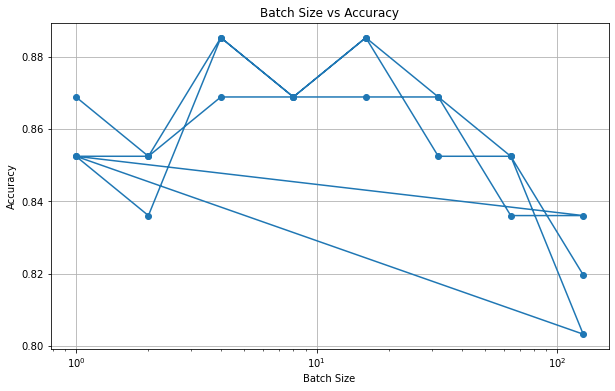

Conclusiones para el gráfico de Batch Size vs Accuracy:
El gráfico muestra cómo varía la precisión (accuracy) del modelo con diferentes tamaños de lote.


In [36]:
### Tu código aquí
# Variando el tamaño
for batch_size in batch_size_range:
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, epochs=20, batch_size=batch_size, validation_split=0.1, verbose=0)
    
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    
    results.append({
        'batch_size': batch_size,
        'loss': loss,
        'accuracy': accuracy
    })

# Gráfico de Batch vs Accuracy
batch_sizes = [result['batch_size'] for result in results]
accuracies = [result['accuracy'] for result in results]

plt.figure(figsize=(10, 6))
plt.plot(batch_sizes, accuracies, marker='o')
plt.title('Batch Size vs Accuracy')
plt.xlabel('Batch Size')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.grid(True)
plt.show()

# Conclusiones
print("Conclusiones para el gráfico de Batch Size vs Accuracy:")
print("El gráfico muestra cómo varía la precisión (accuracy) del modelo con diferentes tamaños de lote.")


### Variabilidad en Neuronas

Realiza 2 gráficos.  Uno con cada una de las variables indicadas para el eje Y.

* Eje X: Número de neuronas.
* Eje Y: Precisión y pérdida.

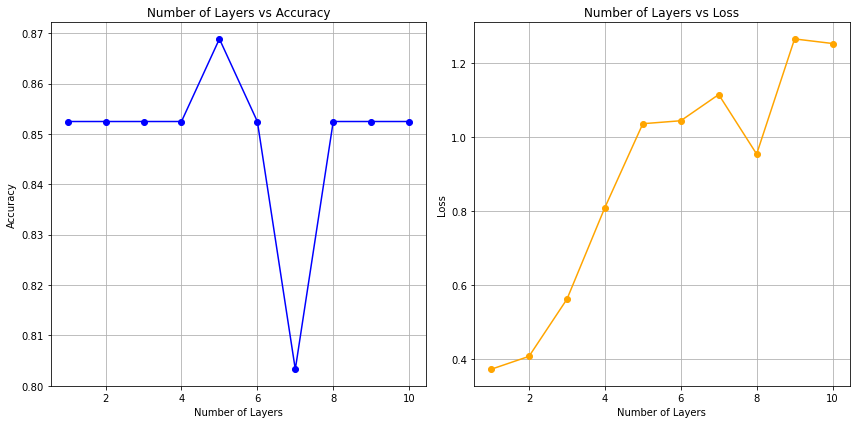

El primer gráfico muestra cómo varía la precisión del modelo con diferentes números de capas ocultas.
El segundo gráfico muestra cómo varía la pérdida del modelo con diferentes números de capas ocultas.


In [43]:
### Tu código aquí
# Datos normalizados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

num_layers_range = range(1, 11)

results = []

# Variando el número de capas
for num_layers in num_layers_range:
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    for _ in range(num_layers - 1):
        model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=0)
    
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    
    results.append({
        'num_layers': num_layers,
        'loss': loss,
        'accuracy': accuracy
    })

# Gráfico Layers vs Accuracy 
num_layers = [result['num_layers'] for result in results]
accuracies = [result['accuracy'] for result in results]
losses = [result['loss'] for result in results]

plt.figure(figsize=(12, 6))

# Gráfico de Precisión vs Número de Capas
plt.subplot(1, 2, 1)
plt.plot(num_layers, accuracies, marker='o', color='blue')
plt.title('Number of Layers vs Accuracy')
plt.xlabel('Number of Layers')
plt.ylabel('Accuracy')
plt.grid(True)

# Gráfico de Pérdida vs Número de Capas
plt.subplot(1, 2, 2)
plt.plot(num_layers, losses, marker='o', color='orange')
plt.title('Number of Layers vs Loss')
plt.xlabel('Number of Layers')
plt.ylabel('Loss')
plt.grid(True)

plt.tight_layout()
plt.show()

# Conclusiones 
print("El primer gráfico muestra cómo varía la precisión del modelo con diferentes números de capas ocultas.")
print("El segundo gráfico muestra cómo varía la pérdida del modelo con diferentes números de capas ocultas.")

### Variabilidad en Épocas

Realiza 1 gráfico

* Eje X: Número de épocas.
* Eje Y: Precisión y pérdida.

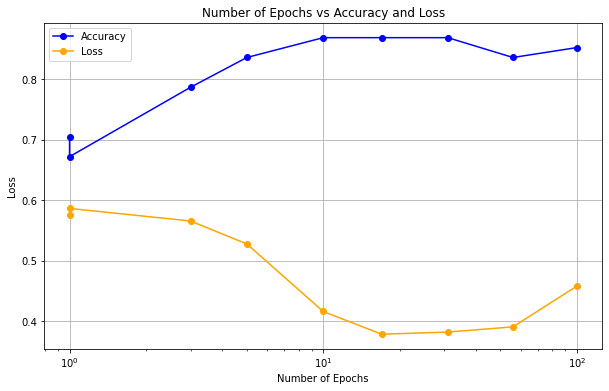

Podemos observar que a medida que aumentan las épocas, la precisión tiende a aumentar y la pérdida tiende a disminuir.


In [45]:
### Tu código aquí
# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

num_epochs_range = [int(10 ** (i / 4)) for i in range(9)]

results = []

# Variando el número de épocas
for num_epochs in num_epochs_range:
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=32, validation_split=0.1, verbose=0)
    
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    
    results.append({
        'num_epochs': num_epochs,
        'loss': loss,
        'accuracy': accuracy
    })

# Gráfico Epochs 
num_epochs = [result['num_epochs'] for result in results]
accuracies = [result['accuracy'] for result in results]
losses = [result['loss'] for result in results]

plt.figure(figsize=(10, 6))

# Gráfico de Precisión
plt.plot(num_epochs, accuracies, marker='o', color='blue', label='Accuracy')
plt.title('Number of Epochs vs Accuracy and Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.grid(True)

# Gráfico de Pérdida vrs Epocas
plt.plot(num_epochs, losses, marker='o', color='orange', label='Loss')
plt.ylabel('Loss')

plt.legend()
plt.show()

# Conclusiones
print("Podemos observar que a medida que aumentan las épocas, la precisión tiende a aumentar y la pérdida tiende a disminuir.")



### Tamaño de Batch:

Realiza 2 gráficos.  Uno con cada una de las variables indicadas para el eje Y.
* Eje X: Tamaño del batch.
* Eje Y: Precisión y pérdida.

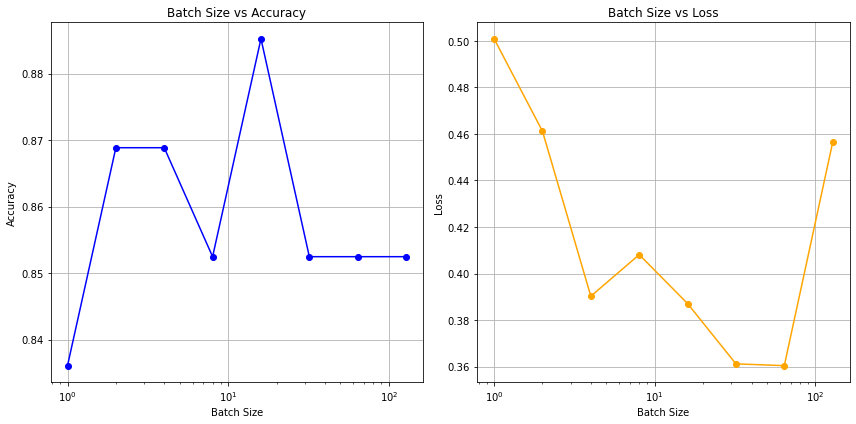

Podemos observar que en general, tamaños de lote medianos tienden a producir mejores resultados de precisión.
Parece que en términos de pérdida, los tamaños de lote medianos también tienden a ser favorables.


In [46]:
### Tu código aquí
# Tamaño con incremento logarítmico
batch_size_range = [2 ** i for i in range(0, int(np.log2(len(X_train))) + 1)]

results = []

# Pruebas
for batch_size in batch_size_range:
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, epochs=20, batch_size=batch_size, validation_split=0.1, verbose=0)
    
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    
    results.append({
        'batch_size': batch_size,
        'loss': loss,
        'accuracy': accuracy
    })

# Gráfico con Batch vs Accuracy
batch_sizes = [result['batch_size'] for result in results]
accuracies = [result['accuracy'] for result in results]
losses = [result['loss'] for result in results]

plt.figure(figsize=(12, 6))

# Gráfico de Precisión vs tamaño del Batch
plt.subplot(1, 2, 1)
plt.plot(batch_sizes, accuracies, marker='o', color='blue')
plt.title('Batch Size vs Accuracy')
plt.xlabel('Batch Size')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.grid(True)

# Gráfico de Pérdida vs Tamaño del Batch
plt.subplot(1, 2, 2)
plt.plot(batch_sizes, losses, marker='o', color='orange')
plt.title('Batch Size vs Loss')
plt.xlabel('Batch Size')
plt.ylabel('Loss')
plt.xscale('log')
plt.grid(True)

plt.tight_layout()
plt.show()

# Conclusiones 
print("Podemos observar que en general, tamaños de lote medianos tienden a producir mejores resultados de precisión.")
print("Parece que en términos de pérdida, los tamaños de lote medianos también tienden a ser favorables.")
